# FINAL TASK PROJECT BASED INTERNSHIP IDX PARTNERS DS:<br>BUILD A PREDICTION MODEL TO PREDICT THE CLIENT CREDIT WORTHINESS

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Load Data & Premilinary Data Analysis

In [2]:
# Read the CSV file into a DataFrame(dfloan)
dfloan = pd.read_csv('../data/loan_data_2007_2014.csv', low_memory=False)

# Select th ecolumns of dfoan that have object dtype and store them in categoric
categoric = dfloan.select_dtypes('object')

# Seelct the columns of dfloan that have number dtype and store them in numeric
numeric = dfloan.select_dtypes('number')

# Assign the number of rows and columns to rows and cols variables
rows = dfloan.shape[0]
cols = dfloan.shape[1]

# Print the shape of dfloan
print(f'dfloan Rows: {rows}\ndfloan Columns: {cols}')

# Print sample of 6 rows from dfloan
print('\nData sample showcase:')
display(dfloan.sample(6))

# Print statistical summary of the cateogircal data in dfloan
print('\nCategorical data statistical summary:')
display(categoric.describe())

# Print statistical summary of the numerical data in dfloan
print('\nNumerical data statistical summary:')
display(numeric.describe())

dfloan Rows: 466285
dfloan Columns: 75

Data sample showcase:


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
38485,38485,355876,360839,5000,4200,934.753071,36 months,11.59,138.68,C,C2,NaN,< 1 year,RENT,30000.0,Not Verified,Sep-08,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,I am starting my own law firm. I cater to peop...,other,Small Business Loan,606xx,IL,17.08,0.0,May-96,1.0,30.0,NaN,8.0,0.0,10655,68.7,20.0,f,0.00,0.00,4964.930000,943.79,4200.01,764.92,0.0,0.0,0.0,Mar-11,943.81,NaN,Oct-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123209,123209,5845124,7306876,9600,9600,9600.000000,36 months,14.09,328.53,B,B5,Littles Heating and Air,10+ years,RENT,36000.0,Not Verified,Jun-13,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,pay credit cards,278xx,NC,11.97,0.0,Jul-09,0.0,NaN,NaN,8.0,0.0,6707,60.4,10.0,f,1897.53,1897.53,9848.410000,9848.41,7702.47,2145.94,0.0,0.0,0.0,Dec-15,328.53,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,11321.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11100.0,NaN,NaN,NaN
308082,308082,27390173,29883240,21000,21000,21000.000000,36 months,9.17,669.46,B,B1,Owner/Managing Broker,10+ years,MORTGAGE,100000.0,Source Verified,Sep-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,major_purchase,Major purchase,629xx,IL,9.30,5.0,Jun-89,0.0,7.0,NaN,13.0,0.0,21325,75.1,33.0,w,12378.48,12378.48,10711.360000,10711.36,8621.52,2089.84,0.0,0.0,0.0,Jan-16,669.46,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,286.0,348455.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28400.0,NaN,NaN,NaN
216560,216560,1298262,1542902,10000,10000,9975.000000,36 months,13.11,337.47,B,B4,Social Security Administration,< 1 year,RENT,65000.0,Verified,May-12,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,consolidation loan,064xx,CT,12.90,0.0,Feb-93,0.0,28.0,NaN,14.0,0.0,9383,48.4,42.0,f,0.00,0.00,11870.187350,11840.52,10000.00,1870.19,0.0,0.0,0.0,Jun-14,4129.38,NaN,Jun-14,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13205,13205,786520,974798,6000,6000,6000.000000,36 months,11.99,199.26,B,B5,New York Presbyterian Hosp,10+ years,RENT,55560.0,Source Verified,Jun-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 06/21/11 > Borrower added ...,major_purchase,A New beginning,104xx,NY,7.82,0.0,Sep-89,2.0,NaN,NaN,12.0,0.0,5979,43.0,17.0,f,0.00,0.00,7172.895035,7172.90,6000.00,1172.90,0.0,0.0,0.0,Jul-14,200.66,NaN,Jul-14,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308661,308661,26969998,29463027,20000,20000,20000.000000,60 months,9.17,416.82,B,B1,Truck Driver,1 year,RENT,100000.0,Source Verified,Sep-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,612xx,IL,16.92,0.0,Sep-01,0.0,NaN,NaN,14.0,0.0,11550,43.6,39.0,f,0.00,0.00,20152.833330,20152.83,20000.00,152.83,0.0,0.0,0.0,Oct-14,20152.83,NaN,Oct-14,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN


Categorical data statistical summary:


,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,438697,445277,466285,466285,466285,466285,466285,466285,125981,466285,466264,466285,466285,466256,466285,465909,239071,466243,466285
unique,2,7,35,205475,11,6,3,91,9,2,466285,124435,14,63098,888,50,664,2,98,100,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
freq,337953,136929,31686,5399,150049,235875,168055,38782,224226,466276,1,234,274195,164075,5304,71450,3674,303005,179620,208393,327699,466285



Numerical data statistical summary:


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [98]:
dfloan.acc_now_delinq.value_counts()

acc_now_delinq
0.0    464524
1.0      1623
2.0        92
3.0        11
4.0         4
5.0         2
Name: count, dtype: int64

from the above categorical columns statistical summary, i found that there's column with too many unique values and there's column with 1 unique value, for 
findings : 
- `url` column contains too many unique values, and we will drop them later
- `desc` column contains too many unique values, and we will drop them later
- `title` column contains too many unique values, and we will drop them later
- `pymnt_plan` column is a binary column and it's very imbalanced, n: 99.9% and y: 0.00005%, we will drop this column later
- `application_type` column only have 1 unique value, the data values don't have any variance, we will drop this column later
- `zip_code` column contains too many unique values, and we will drop them later and i don't think it's important for our analysis
- `addr_state` i'm about to generalize this column to region, so i will keep this column for now
- `policy_code` column only have 1 unique value, the data values don't have any variance, we will drop this column later
- `acc_now_delinq` column is a categorical column with value range from 0 - 5 and it's very imbalanced, 0: 99.9%, because of the 0 values is too much this coluumn considered only have 1 unique value, we will drop this column later 

### Mising Values checking

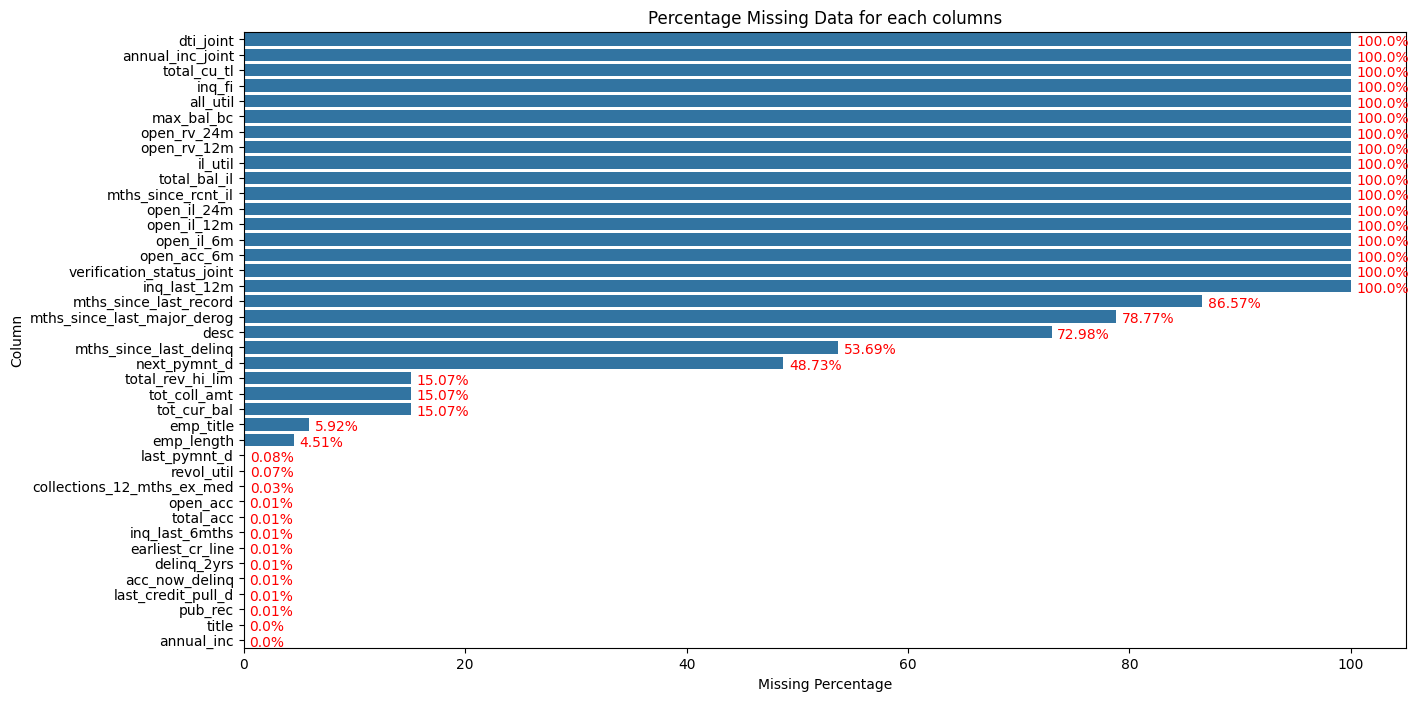

In [50]:
# Calculate the percentage of missing values in each column of dfloan
missing = (dfloan.isnull().sum() / len(dfloan)) * 100

# Filer out the columns that have no missing values
missing = missing[missing > 0]

# Create a DataFrame from the missing data
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing %': np.round(missing.values, 2) # Round the missing percentage to 2 decimal places
}) 

# Sorth the DataFrame by the percentage of missing values in descending order
missing_df = missing_df.sort_values('Missing %', ascending=False)


# Create a bar plot of the missing data
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Missing %', y='Column', data=missing_df)

# Add the percentage of missing data as text on the bars
for i, v in enumerate(missing_df['Missing %']):
    ax.text(v + 0.5, i + .4, str(v) + '%', color='red')

# Set the labels and title of the plot
ax.set_xlabel('Missing Percentage')
ax.set_title('Percentage Missing Data for each columns')

# Display the plot
plt.show()

In [58]:
# Count the number of rows in missing_df where 'Missing %' is greater than 40
len(missing_df[missing_df['Missing %'] > 40])

22

- The data contains a lot of missing values, there's 22 columns that contains missing values more than 40% of the data, for this columns i decided to drop them later because it's too much missing values, and i think it's not valid.

- For the rest of the columns i will consider to fill(impute), drop them after i do furhter analysis on the data.

### Duplicate Values Checking

In [71]:
# print the number of duplicated rows in dfloan
print(dfloan.duplicated().sum())

0


Our data not contains any duplicate values, so we don't need to drop any duplicate values.

### Outlier Checking
This outlier checking it's just a simple checking, because we want to make a scorecard model, outlier can be sensitive to outliers in the data. Outliers can skew the model's parameter estimates, leading to less accurate predictions.

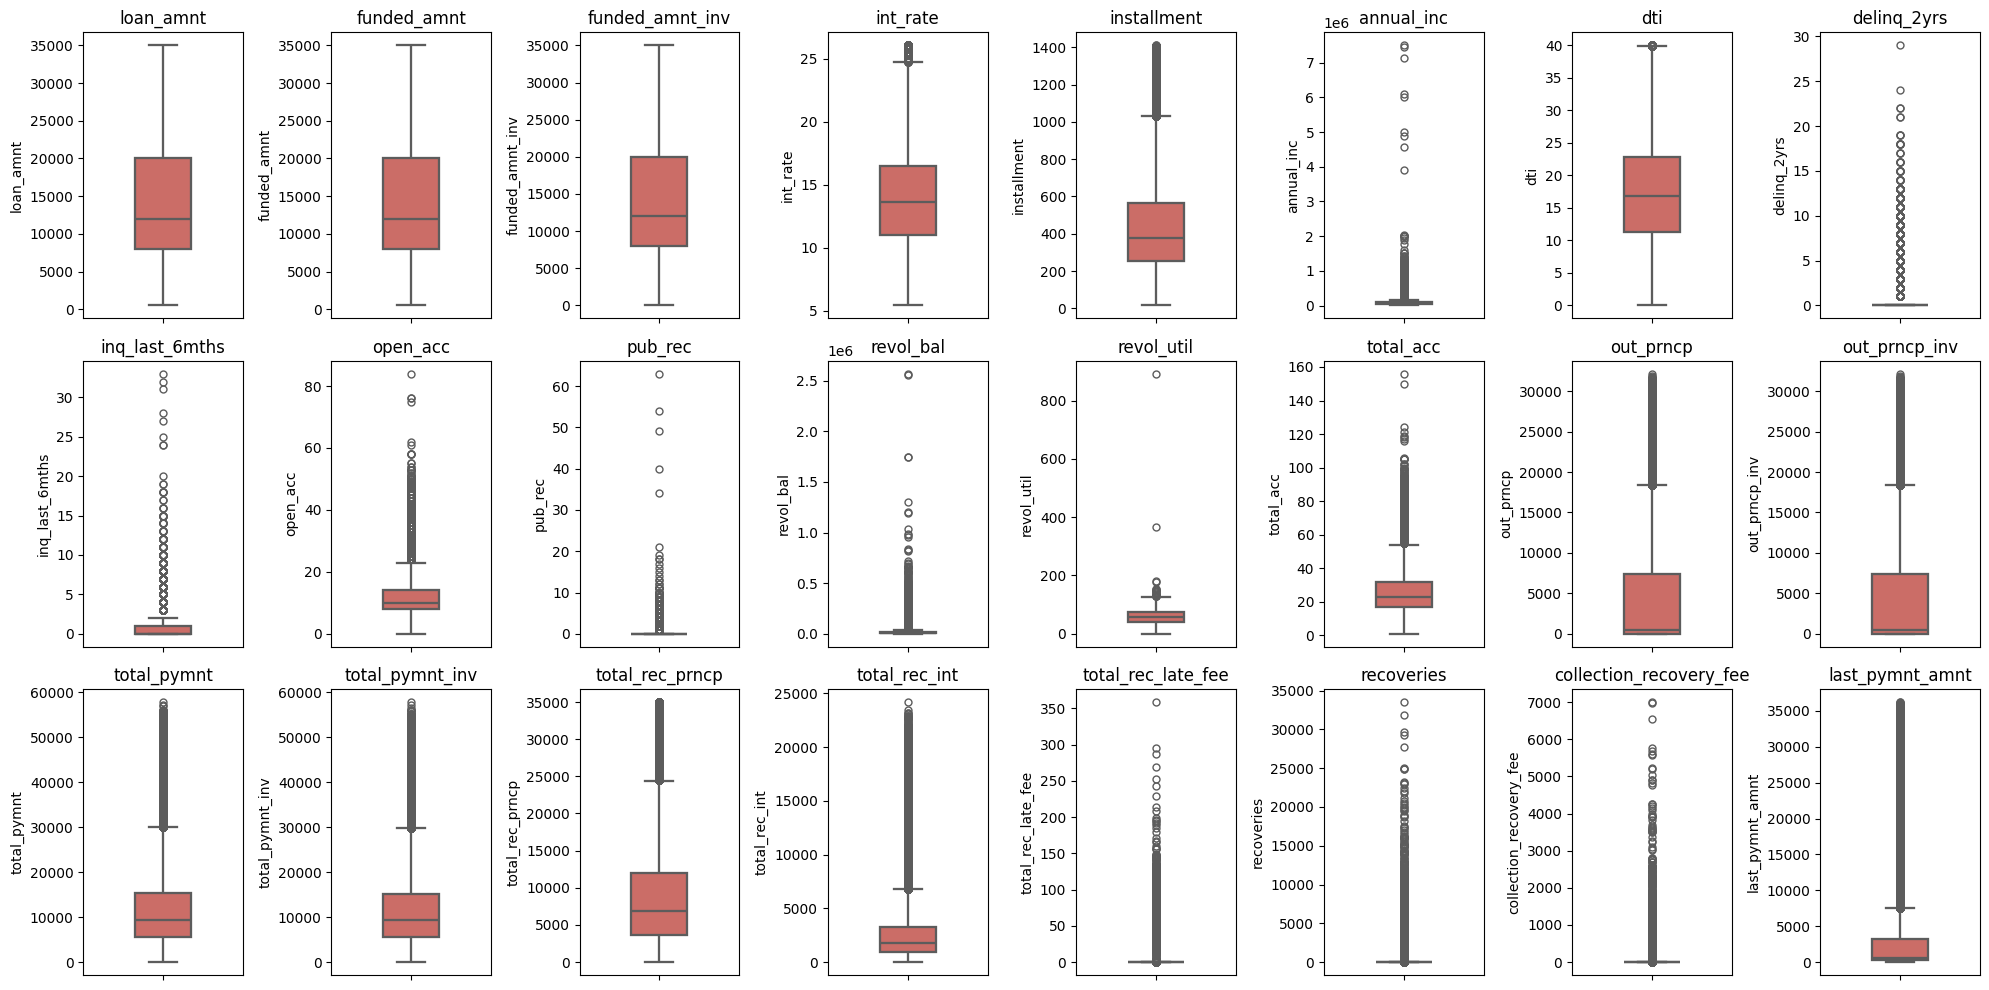

In [3]:
# Create a copy of the numeric DataFrame to avoid modifying the original data
numeric_copy = numeric.copy()

# Drop unnecessary columns from the copied DataFrame
numeric_dropped = numeric_copy.drop(columns=['id', 'member_id', 'Unnamed: 0', 'policy_code', 'acc_now_delinq', 'collections_12_mths_ex_med'])

# Calculate the percentage of missing values in each column
num_mis = (numeric_dropped.isna().sum() / len(dfloan) * 100)

# Filter out the columns with less than 0.4% missing values
low_missing_num = num_mis[num_mis < 0.4]

# Create a new DataFrame with the filtered columns
numeric_new = numeric_copy.loc[:, low_missing_num.index]

# Create a figure with a specific size for plotting
plt.figure(figsize=(20, 10))

# Loop through each column in the new DataFrame
for i, col in enumerate(numeric_new.columns):
    # Create a subplot for each column
    plt.subplot(3, 8, i+1)
    # Create a boxplot for the current column
    sns.boxplot(numeric[col], palette='hls', width=0.35, linewidth=1.65, fliersize=5)
    # Set the title of the subplot to the column name
    plt.title(col)
    # Adjust the layout of the plot
    plt.tight_layout()

# Display the plot
plt.show()

`delinq_2yrs` -> binning

From the boxplot above, we can detect that there's some column that contains outliers:
- `annual_inc`
- `delinq_2yrs`
- `inq_last_6mths`
- `open_acc`
- `pub_rec`
- `revol_bal`
- `revol_util`
- `total_acc`
- `total_rec_fee`
- `recoveries`
- `collection_recovery_fee`

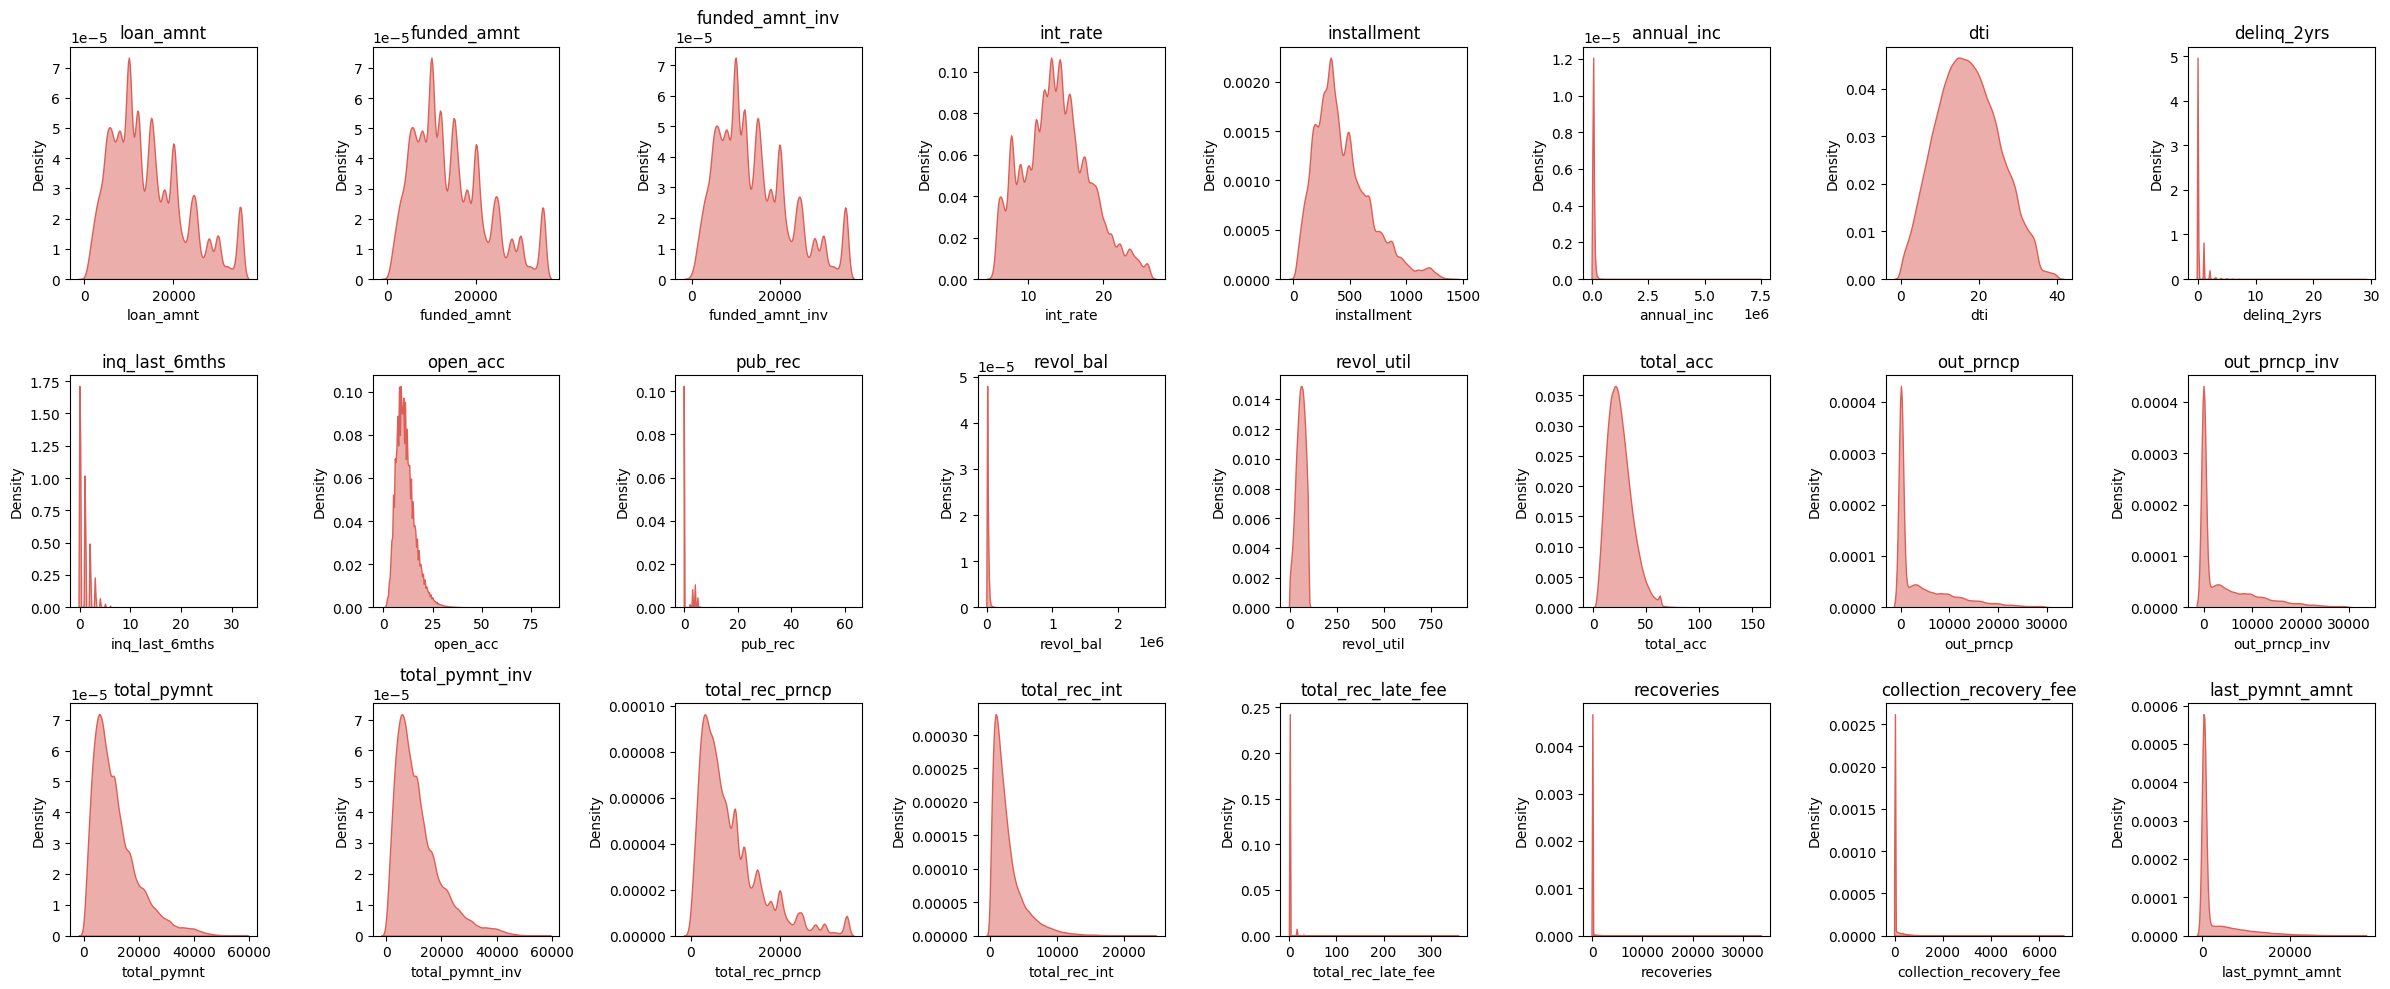

In [39]:
# create kdeplot 3x9 grid of the numeric DataFrame
plt.figure(figsize=(24, 10))
for i, col in enumerate(numeric_new.columns):
    plt.subplot(3, 8, i+1)
    sns.kdeplot(numeric[col], color='#db5f57', shade=True, alpha=0.5)
    plt.title(col)
    plt.tight_layout()

# Display the plot 
plt.show()

most of our numerical data distributios are positively skewed, for columns with <40% missing values, the values will be imputed with median, and for columns with >40% missing values, the columns will be dropped.

In [23]:
# Read the CSV file into a DataFrame(dfloan)
dfloan = pd.read_csv('../data/loan_data_2007_2014.csv', low_memory=False)

In [3]:
# Dropping unnecessary columns from the dataframe
dfloan = dfloan.drop(columns=['id', 'member_id', 'Unnamed: 0'], axis=1)

# Define a function to map loan status to 'Good Loan' or 'Bad Loan'
def map_loan_status(status):
    """
    Function to map loan status to 'Bad Loan' or 'Good Loan'.
    
    Parameters:
    status (str): The loan status to be mapped.
    
    Returns:
    str: 'Bad Loan' if the status is in the list of default statuses, 'Good Loan' otherwise.
    """
    
    # List of loan statuses that imply a default
    default_statuses = [
        'Charged Off', 
        'Late (31-120 days)', 
        'Late (16-30 days)',
        'Default',
        'Does not meet the credit policy. Status:Charged Off'
    ]
    
    # Return 'Bad Loan' if the status is in the list of default statuses, 'Good Loan' otherwise
    return 'Bad Loan' if status in default_statuses else 'Good Loan'

# Apply the map_loan_status function to each status in the 'loan_status' column
dfloan['loan_status'] = dfloan['loan_status'].apply(map_loan_status)

### Loan Status distribution

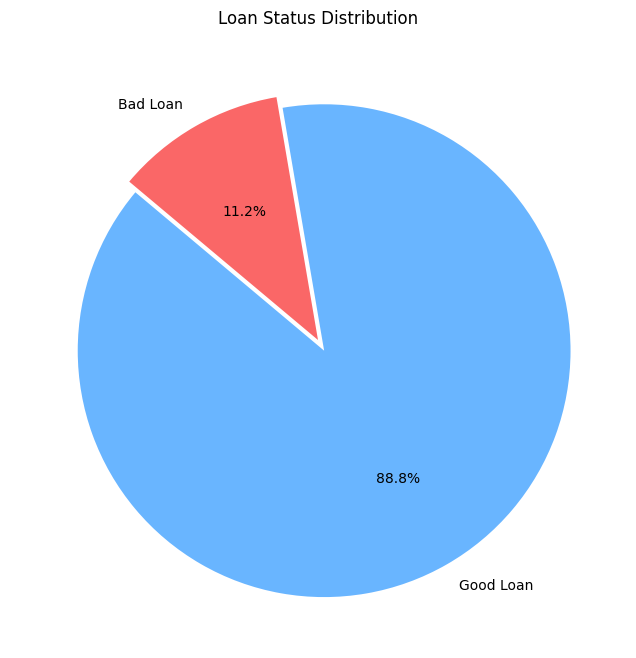

In [4]:
# Create a pie chart of the loan_status column
plt.figure(figsize=(8, 8))

# Define 
target_colors = ['#69B5FF','#FA6767']
dfloan['loan_status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, explode=(0.05, 0), colors=target_colors)
plt.title('Loan Status Distribution')
plt.ylabel('')
plt.show()

### Define Function to plot 

#### Function to plot stacked bar chart

In [87]:
def create_stacked_barchart(data, value_col, status_col, order, target_colors, bbox_to_anchor):
    """
    This function creates a stacked bar chart of loan statuses.

    Parameters:
    data (DataFrame): The DataFrame to create the stacked bar chart from.
    value_col (str): The name of the column in `data` that contains the groups (e.g., loan grades).
    status_col (str): The name of the column in `data` that contains the loan statuses.
    order (list): The order in which to reindex the `lstatus_props` DataFrame.
    target_colors (list): The colors to use for the 'Good Loan' and 'Bad Loan' bars.
    bbox_to_anchor (tuple): The location to place the legend in bbox_transform coordinates.

    Returns:
    None
    """

    # Calculate the proportion of each loan status within each group
    lstatus_props = data.groupby(value_col)[status_col].value_counts().unstack()

    # Reindex lstatus_props according to the provided order
    lstatus_props = lstatus_props.reindex(order)

    # Normalize the counts to get the proportion and convert to percentages
    lstatus_props = (lstatus_props.div(lstatus_props.sum(axis=1), axis=0) * 100)

    # Create the 'Good Loan' bars
    bars1 = plt.bar(lstatus_props.index, lstatus_props['Good Loan'], color=target_colors[0], label='Good Loan')

    # Create the 'Bad Loan' bars
    bars2 = plt.bar(lstatus_props.index, lstatus_props['Bad Loan'], bottom=lstatus_props['Good Loan'], color=target_colors[1], label='Bad Loan')

    # Calculate total height of each bar
    total = [i+j for i,j in zip(lstatus_props['Good Loan'], lstatus_props['Bad Loan'])]

    # Add percentage annotations only for 'Bad Loan'
    for bar1, bar2, total in zip(bars1, bars2, total):
        percentage2 = bar2.get_height() / total * 100
        plt.text(bar2.get_x() + bar2.get_width()/2, bar1.get_height() + bar2.get_height() - 5, f'{percentage2:.1f}%', ha='center', va='bottom', color='black')

    # Set the title and labels
    plt.title(f"Client's Default Rate Compared by Their {value_col.replace('_', ' ').title()}", y=1.09, fontsize=18, fontweight='bold')
    plt.xlabel(f'{value_col.replace("_", " ").title()}', fontsize=12.5, loc='right')
    plt.ylabel('Percentage of Clients', fontsize=12.5)

    # Get current axes and make the top spine invisible
    plt.gca().spines['top'].set_visible(False)

    # Get current axes and make the right spine invisible
    plt.gca().spines['right'].set_visible(False)

    # Add a legend
    plt.legend(title='Loan Status', loc='upper right', bbox_to_anchor=bbox_to_anchor)

#### Function to create lineplot of loan status over time

In [ ]:
def create_lineplot(x, y, data, hue, target_colors, bbox_to_anchor):
    """
    This function creates a line plot of loan amounts and annual income by employment length.

    Parameters:
    x (str): The name of the column in `data` to be used as the x-axis.
    y (str): The name of the column in `data` to be used as the y-axis.
    data (DataFrame): The DataFrame to create the line plot from.
    hue (str): The name of the column in `data` to be used as the hue.
    target_colors (list): The colors to use for the 'Good Loan' and 'Bad Loan' lines.
    bbox_to_anchor (tuple): The location to place the legend in bbox_transform coordinates.

    Returns:
    None
    """

    # Create a line plot of loan amounts and annual income by employment length
    sns.lineplot(x=x, y=y, data=data, palette=target_colors, ci=None, hue=hue)

    # Set the title and labels
    plt.title(f'{y.replace("_", " ").title()} by Employment Length', fontsize=18, fontweight='bold', y=1.09)
    plt.xlabel('Employment Length', fontsize=12.5, labelpad=10, loc='right')
    plt.ylabel(f'{y.replace("_", " ").title()}', fontsize=12.5)

    # Add a legend
    plt.legend(title='Loan Status', loc='upper right', bbox_to_anchor=bbox_to_anchor)

    # Remove the top and right spines from plot
    sns.despine()

### Address State analysis

In [45]:
dfloan.addr_state.value_counts().index

Index(['CA', 'NY', 'TX', 'FL', 'IL', 'NJ', 'PA', 'OH', 'GA', 'VA', 'NC', 'MI',
       'MA', 'MD', 'AZ', 'WA', 'CO', 'MN', 'MO', 'CT', 'IN', 'NV', 'TN', 'OR',
       'WI', 'AL', 'SC', 'LA', 'KY', 'KS', 'OK', 'AR', 'UT', 'NM', 'HI', 'WV',
       'NH', 'RI', 'DC', 'MT', 'DE', 'AK', 'MS', 'WY', 'SD', 'VT', 'IA', 'NE',
       'ID', 'ME'],
      dtype='object', name='addr_state')

Seems all the address state in this data is in US, example:
- CA -> California 
- NY -> New York
- TX -> Texas
- FL -> Florida
- IL -> Illinois
- etc.<br>

from this we can find insight on the top 10 state that have the most loan application.

In [15]:
# Count the number of clients in each state
state_counts = dfloan['addr_state'].value_counts()

# Create a data frame with state abbreviations and counts
df_state_counts = pd.DataFrame({'state': state_counts.index, 'count': state_counts.values})

# Create a choropleth map
fig = go.Figure(data=go.Choropleth(
    locations=df_state_counts['state'], # Spatial coordinates
    z = df_state_counts['count'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Clients count",
))

fig.update_layout(
    title={
        'text': "Count of loans by state",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(
            size=20,
            color="black"
        )
    },
    geo_scope='usa', # limit map scope to USA
    width=1000,
    height=600
)

fig.show()

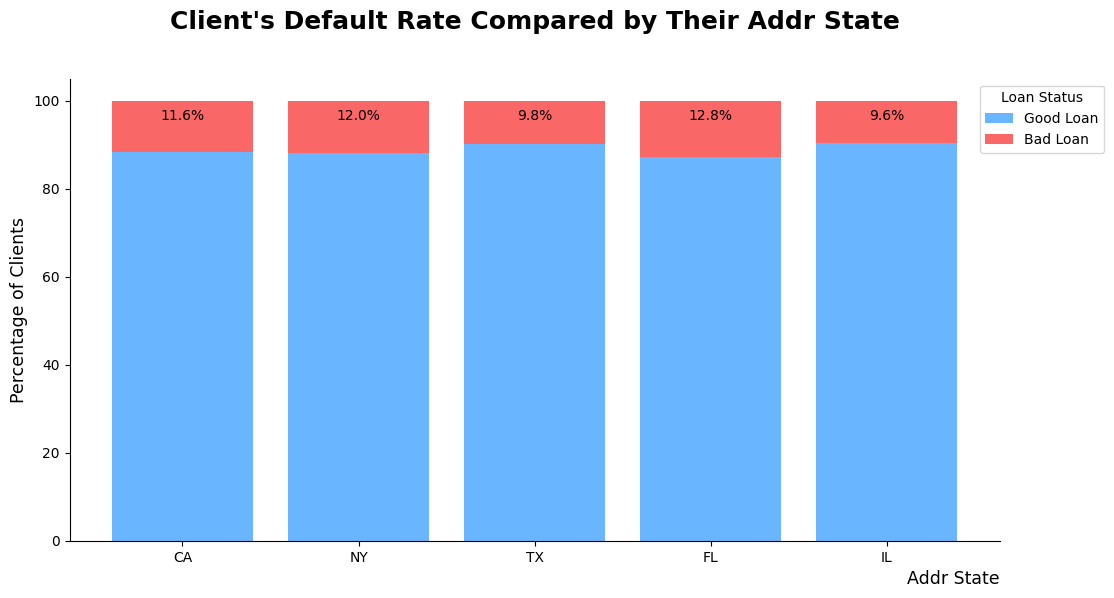

In [88]:
# Get the top 5 states by loan count
top_states = dfloan.addr_state.value_counts().head(5).index

# Filter the dataframe to only include the top 5 states
dfloan_top_states = dfloan[dfloan.addr_state.isin(top_states)]

# set the figure size
plt.figure(figsize=(12, 6))

# Create a stacked bar plot
create_stacked_barchart(dfloan_top_states, 'addr_state', 'loan_status', top_states, target_colors, (1.12, 1))

**Insight🔎** :<br> 
- Our top 1 clients are from California(CA), around 70000 of our clients are from California with 11.6% default rate, 
- The second top clients are from New York(NY), with 12.1% default rate,
- But in Texas(TX) the default rate is smaller than the first two, with 9.8% default rate,
- Lastly the highest default rate from this top 5 state is Florida (FL) with 12.8% default rate.
<br><br>

**Recommendation🌟** :<br>
Focusing our loan efforts on clients in Texas (TX) while maintaining a close eye on default rates in other states.<br>

By prioritizing loan applications from Texas, we can potentially increase our approval rate and reduce the risk of defaults.
<br>
However, it's important to  monitor default rates across all states,  including California and New York,  because these states still represent a significant portion of our clients.
<br>

Here are some additional factors to consider:

- Loan delinquency rates: Track not only defaults but also delinquencies (late payments) in different states. This can give us early warning signs of potential defaults.
- Industry trends: Research loan performance across different industries in Texas. There might be specific sectors with a higher risk of defaults.
- Client profile: Analyze the creditworthiness of borrowers beyond just their location. This includes factors like credit score, income stability, and debt-to-income ratio.


### Client's Grade Loan Status Analysis

In [89]:
dfloan.grade.value_counts().index

Index(['B', 'C', 'D', 'A', 'E', 'F', 'G'], dtype='object', name='grade')

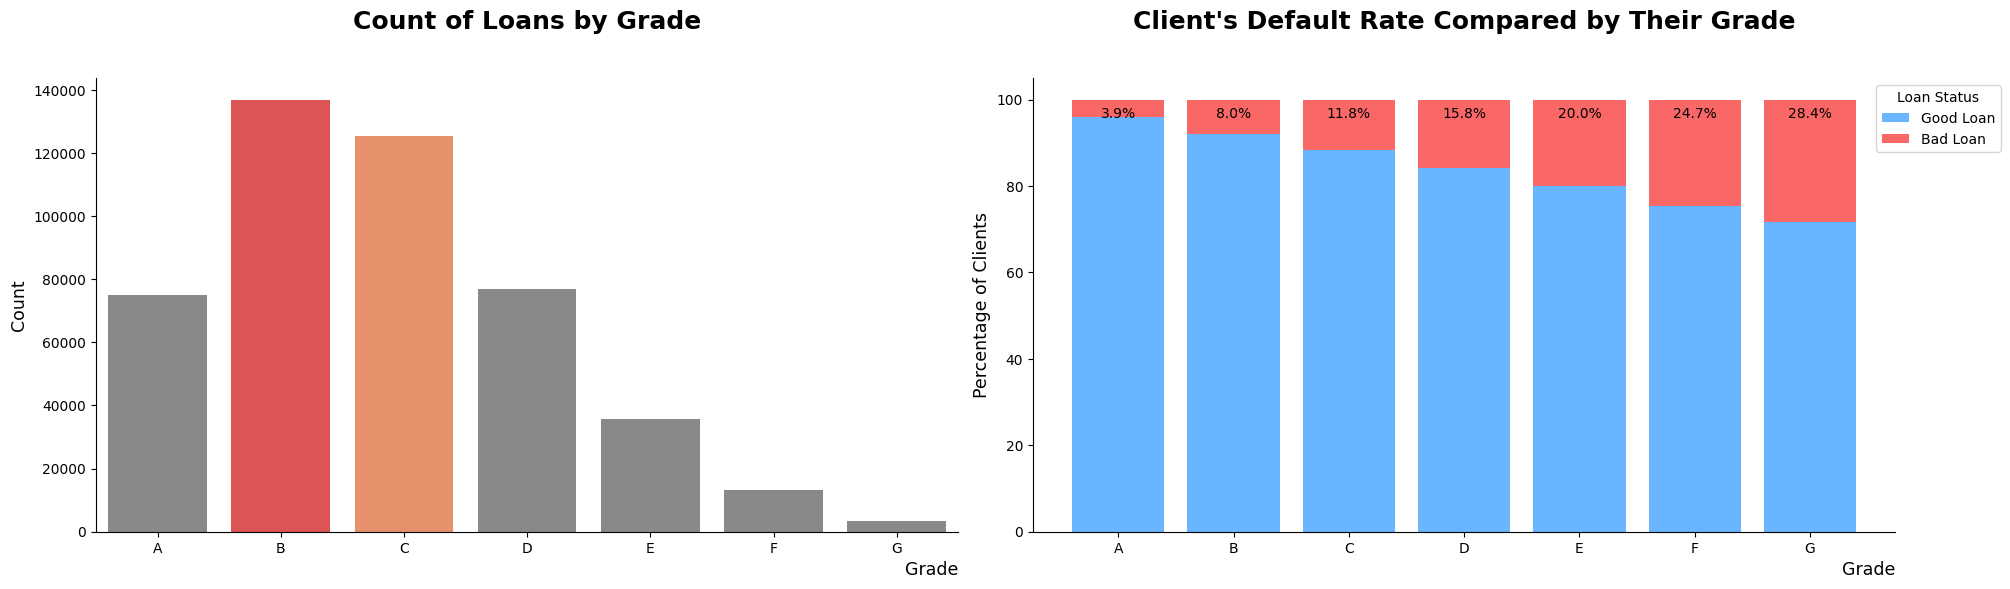

In [90]:
# Set the figure size
plt.figure(figsize=(20, 6))

# Create the first subplot
plt.subplot(1, 2, 1)

# Define the order of the grades and the colors for the bars
order_grade = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
hcolors = ['#898989'] + ['#F13F3F', '#FA8958'] + ['#898989'] * 5

# Create a countplot with seaborn
sns.countplot(x='grade', data=dfloan, order=order_grade, palette=hcolors)

# Set the title and labels for the plot
plt.title('Count of Loans by Grade', fontsize=18, fontweight='bold', y=1.09)
plt.xlabel('Grade', fontsize=12.5, loc='right')
plt.ylabel('Count', fontsize=12.5)

# Remove the top and right spines from plot
sns.despine()

# Create the second subplot
plt.subplot(1, 2, 2)

# Call the function to create a stacked bar chart
create_stacked_barchart(dfloan, 'grade', 'loan_status', order_grade, target_colors, bbox_to_anchor=(1.13, 1))

# Adjust the layout of the plots
plt.tight_layout()

# Display the plots
plt.show()

**Insight🔎** :<br>
- Our clients Loan grade are mostly in B and C grade.

- From the stacked barchart we can see that, the lower the grade the clients have, the higher the default rate.

- The lowest default rate is in Client with A grade loan, with 3.9% default rate.

- and the highest default rate is in Client with G grade loan, with 28.4% default rate.
<br>

**Recommendation🌟** :<br>
- Focus loan efforts on clients with higher loan grades (A, B, C). Since these grades have demonstrably lower default rates, targeting them can help mitigate risk.

- Implement stricter criteria for lower loan grades (D, E, F, G). This could involve stricter requirements for approval, such as higher credit score requirements or smaller loan amounts. You may also consider charging a higher interest rate for these loans to reflect the increased risk.

- Evaluate the possibility of loan restructuring for existing lower-grade loans. This could involve extending the loan term or lowering the interest rate to make it more manageable for the borrower and reduce the risk of default.


### Client's Employment Length Analysis

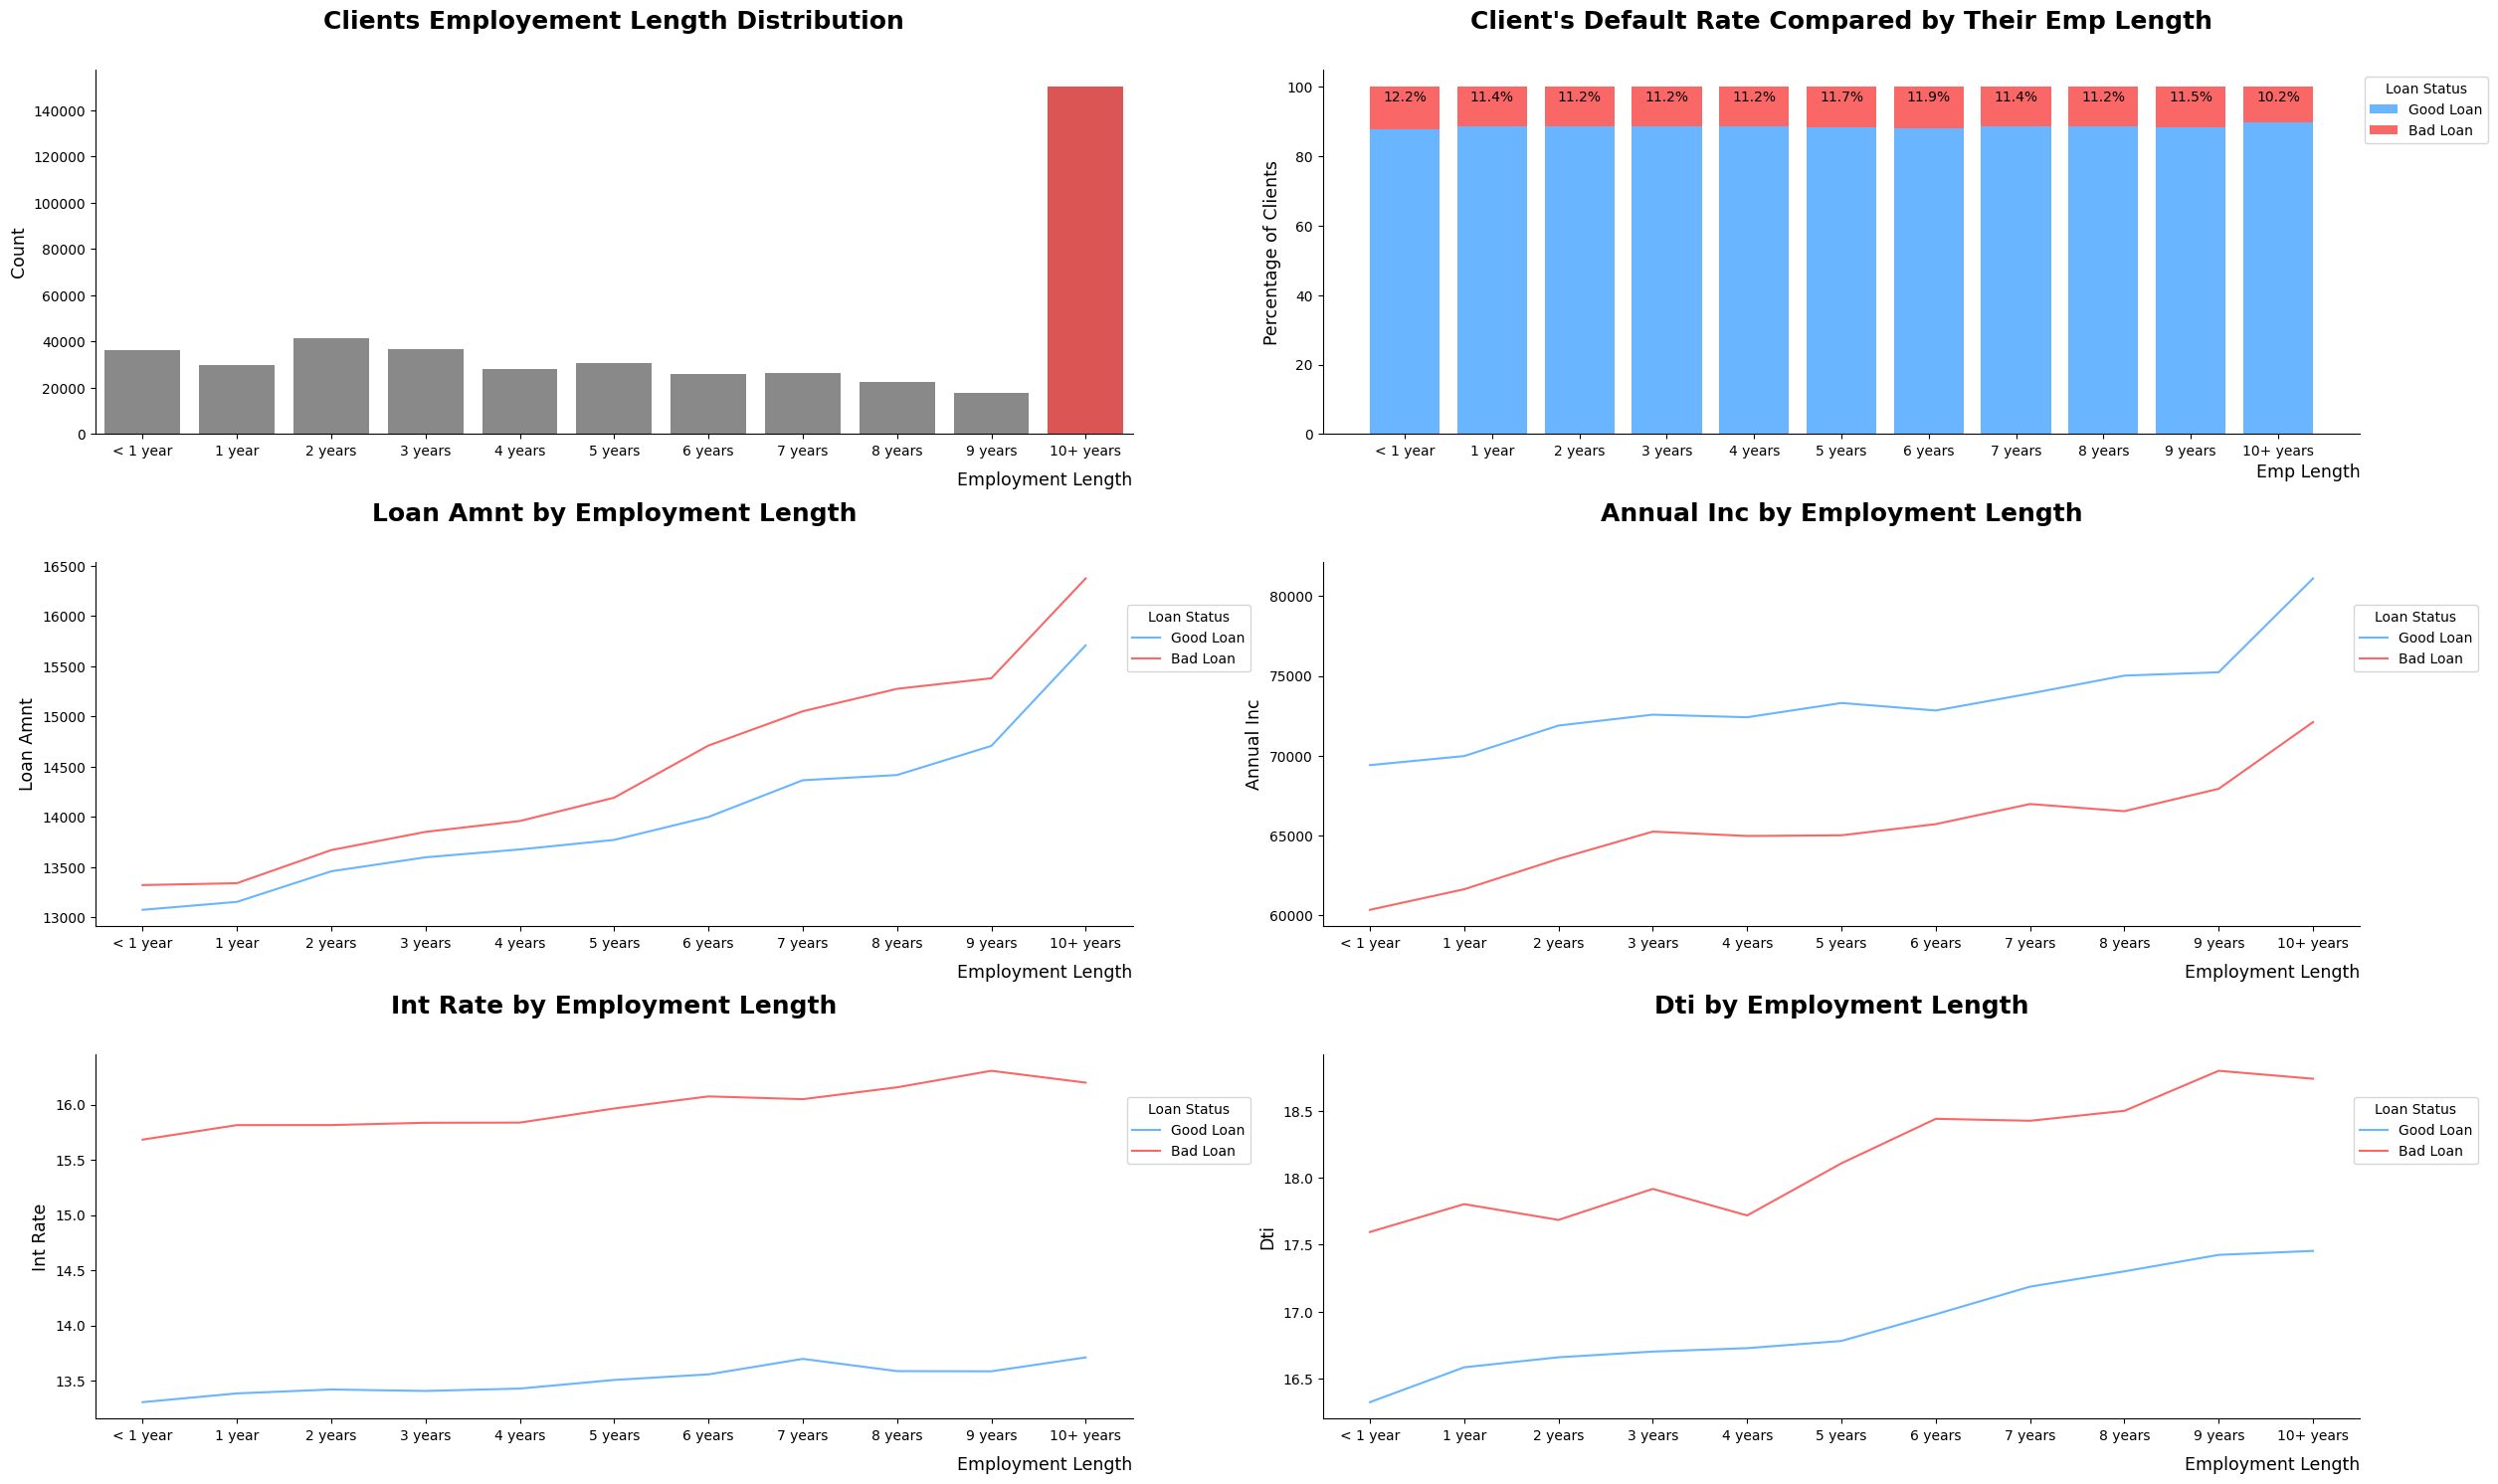

In [132]:
# Set the figure size
plt.figure(figsize=(25, 15))

# Define the order
length_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']

# Convert the 'emp_length' column to a categorical type with the specified order
dfloan['emp_length'] = pd.Categorical(dfloan['emp_length'], categories=length_order, ordered=True)

plt.subplot(3, 2, 1)
order_emp = dfloan.emp_length.value_counts().index
palette_length = ['#898989'] * 10 + ['#F13F3F']
sns.countplot(x='emp_length', data=dfloan, order=length_order, palette=palette_length)
plt.title('Clients Employement Length Distribution', fontsize=18, fontweight='bold', y=1.09)
plt.xlabel('Employment Length', fontsize=12.5, loc='right', labelpad=10)
plt.ylabel('Count', fontsize=12.5)


plt.subplot(3, 2, 2)
create_stacked_barchart(dfloan, 'emp_length', 'loan_status', length_order, target_colors, bbox_to_anchor=(1.13, 1))

plt.subplot(3, 2, 3)
create_lineplot('emp_length', 'loan_amnt', dfloan, 'loan_status', target_colors, (1.12, 0.9))

plt.subplot(3, 2, 4)
create_lineplot('emp_length', 'annual_inc', dfloan, 'loan_status', target_colors, (1.12, 0.9))

plt.subplot(3, 2, 5)
create_lineplot('emp_length', 'int_rate', dfloan, 'loan_status', target_colors, (1.12, 0.9))

plt.subplot(3, 2, 6)
create_lineplot('emp_length', 'dti', dfloan, 'loan_status', target_colors, (1.12, 0.9))
 
plt.tight_layout()
plt.show()

**Insight🔎** :<br>
- Most of our clients are employed for more than 10 years, with 10.2% default rate.
- From the lineplot we can see the more the clients employed, the higher the loan amount they have,
- from that we can see that the Client with bad loan have higher loan amnt than the good clients,
- and also the clients with good loan by the time they employed, they still have a higher loan amount than the bad clients.

**Recommendation🌟** :<br>
- Focus on clients with longer employment lengths. These clients have a lower default rate and are more likely to have a stable income.
- Consider offering loan programs with higher limits for clients with a long employment history (over 10 years). These clients have a lower default rate (10.2% in our data) and can likely manage larger loans.
- Develop a risk-based assessment system that considers both loan amount and employment history. This will allow us to tailor loan offers to each client's specific situation. For example, you might approve a larger loan amount for a long-term employed borrower with a good credit history, even if their loan grade is lower (B or C).

### Deepen the causation of higher loan Amouns for bad clients from the Loan purpose and Home ownership

### Loan Purpose Analysis

In [11]:
# categoric.sample(5)
dfloan.purpose.value_counts()

purpose
debt_consolidation    274195
credit_card           104157
home_improvement       26537
other                  23690
major_purchase          9828
small_business          7013
car                     5397
medical                 4602
moving                  2994
vacation                2487
wedding                 2343
house                   2269
educational              422
renewable_energy         351
Name: count, dtype: int64

Because the loan purpose column contains too many unique values that the values proportions are too small, i only take the top 5 loan purpose for the analysis. and for further binning i will make 4 bins for the loan purpose.

posx and posy should be finite values
posx and posy should be finite values


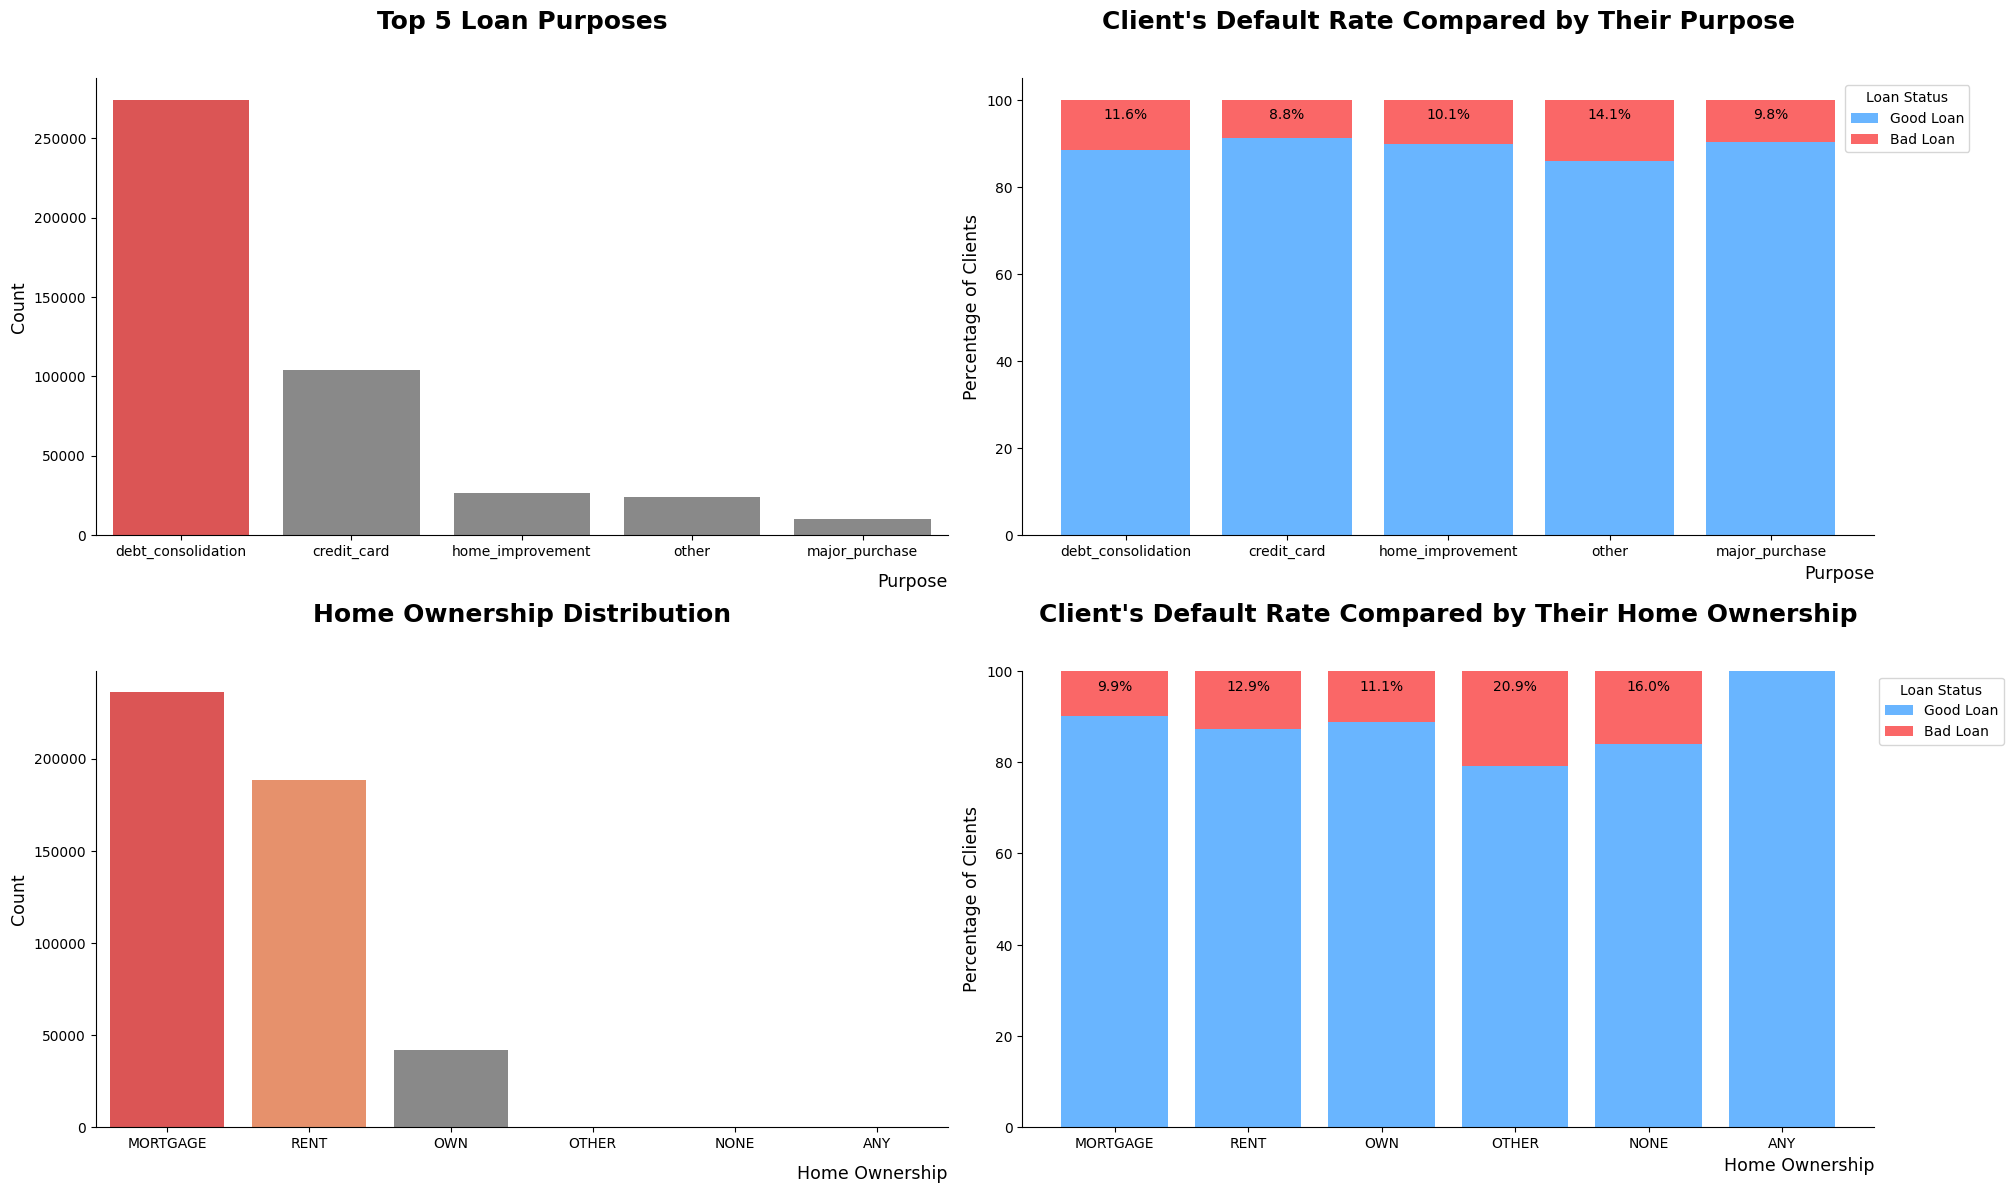

In [94]:
top_purpose = dfloan.purpose.value_counts().head(5)
palette_purpose = ['#F13F3F'] + ['#898989'] * 4 
plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
sns.barplot(x=top_purpose.index, y=top_purpose.values, palette=palette_purpose)
plt.title('Top 5 Loan Purposes', fontsize=18, fontweight='bold', y=1.09)
plt.xlabel('Purpose', fontsize=12.5, loc='right', labelpad=10)
plt.ylabel('Count', fontsize=12.5)
sns.despine()

plt.subplot(2, 2, 2)
create_stacked_barchart(dfloan, 'purpose', 'loan_status', top_purpose.index, target_colors, bbox_to_anchor=(1.12, 1))

plt.subplot(2, 2, 3)
home_order = dfloan.home_ownership.value_counts().index
phome = ['#F13F3F', '#FA8958'] + ['#898989'] * 4
sns.countplot(x='home_ownership', data=dfloan, palette=phome, order=home_order)
plt.title('Home Ownership Distribution', fontsize=18, fontweight='bold', y=1.09)
plt.xlabel('Home Ownership', fontsize=12.5, loc='right', labelpad=10)
plt.ylabel('Count', fontsize=12.5)
sns.despine()

plt.subplot(2, 2, 4)

create_stacked_barchart(dfloan, 'home_ownership', 'loan_status', home_order, target_colors, bbox_to_anchor=(1.16, 1))

plt.tight_layout()
plt.show()

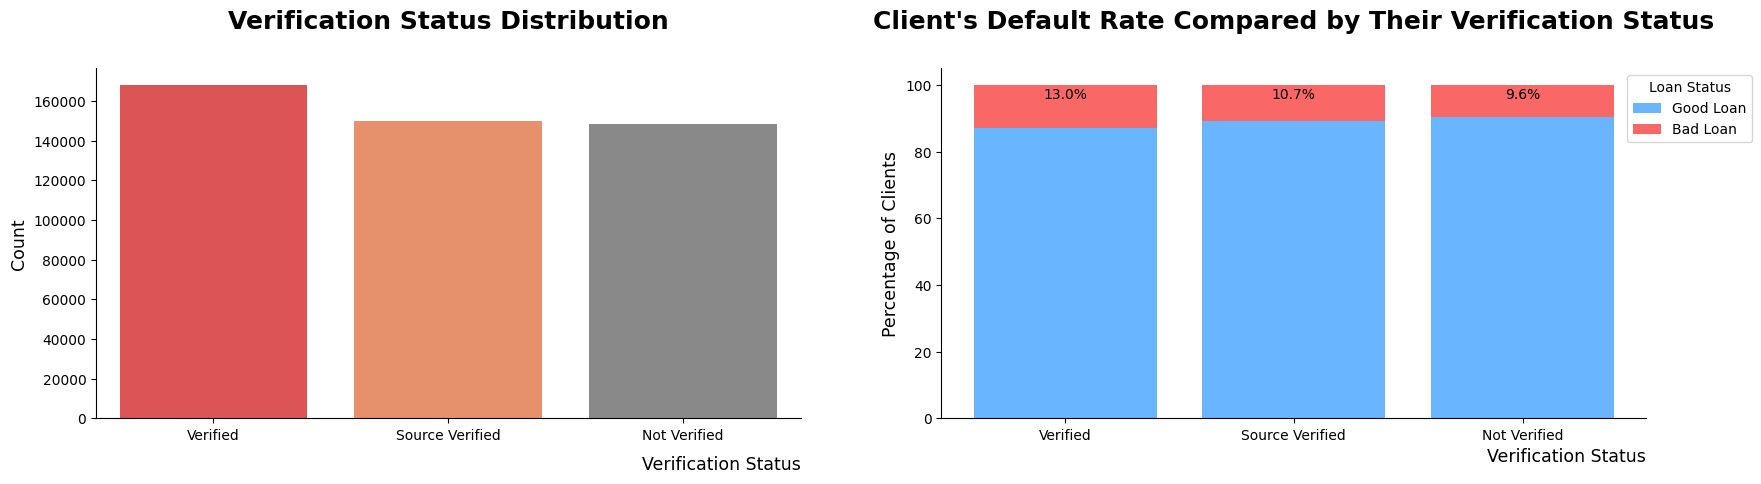

In [97]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.countplot(x='verification_status', data=dfloan, palette=['#F13F3F', '#FA8958', '#898989'])

plt.title('Verification Status Distribution', fontsize=18, fontweight='bold', y=1.09)
plt.xlabel('Verification Status', fontsize=12.5, loc='right', labelpad=10)
plt.ylabel('Count', fontsize=12.5)
sns.despine()

plt.subplot(2, 2, 2)
create_stacked_barchart(dfloan, 'verification_status', 'loan_status', dfloan.verification_status.value_counts().index, target_colors, bbox_to_anchor=(1.16, 1))

<Axes: xlabel='emp_length', ylabel='dti'>

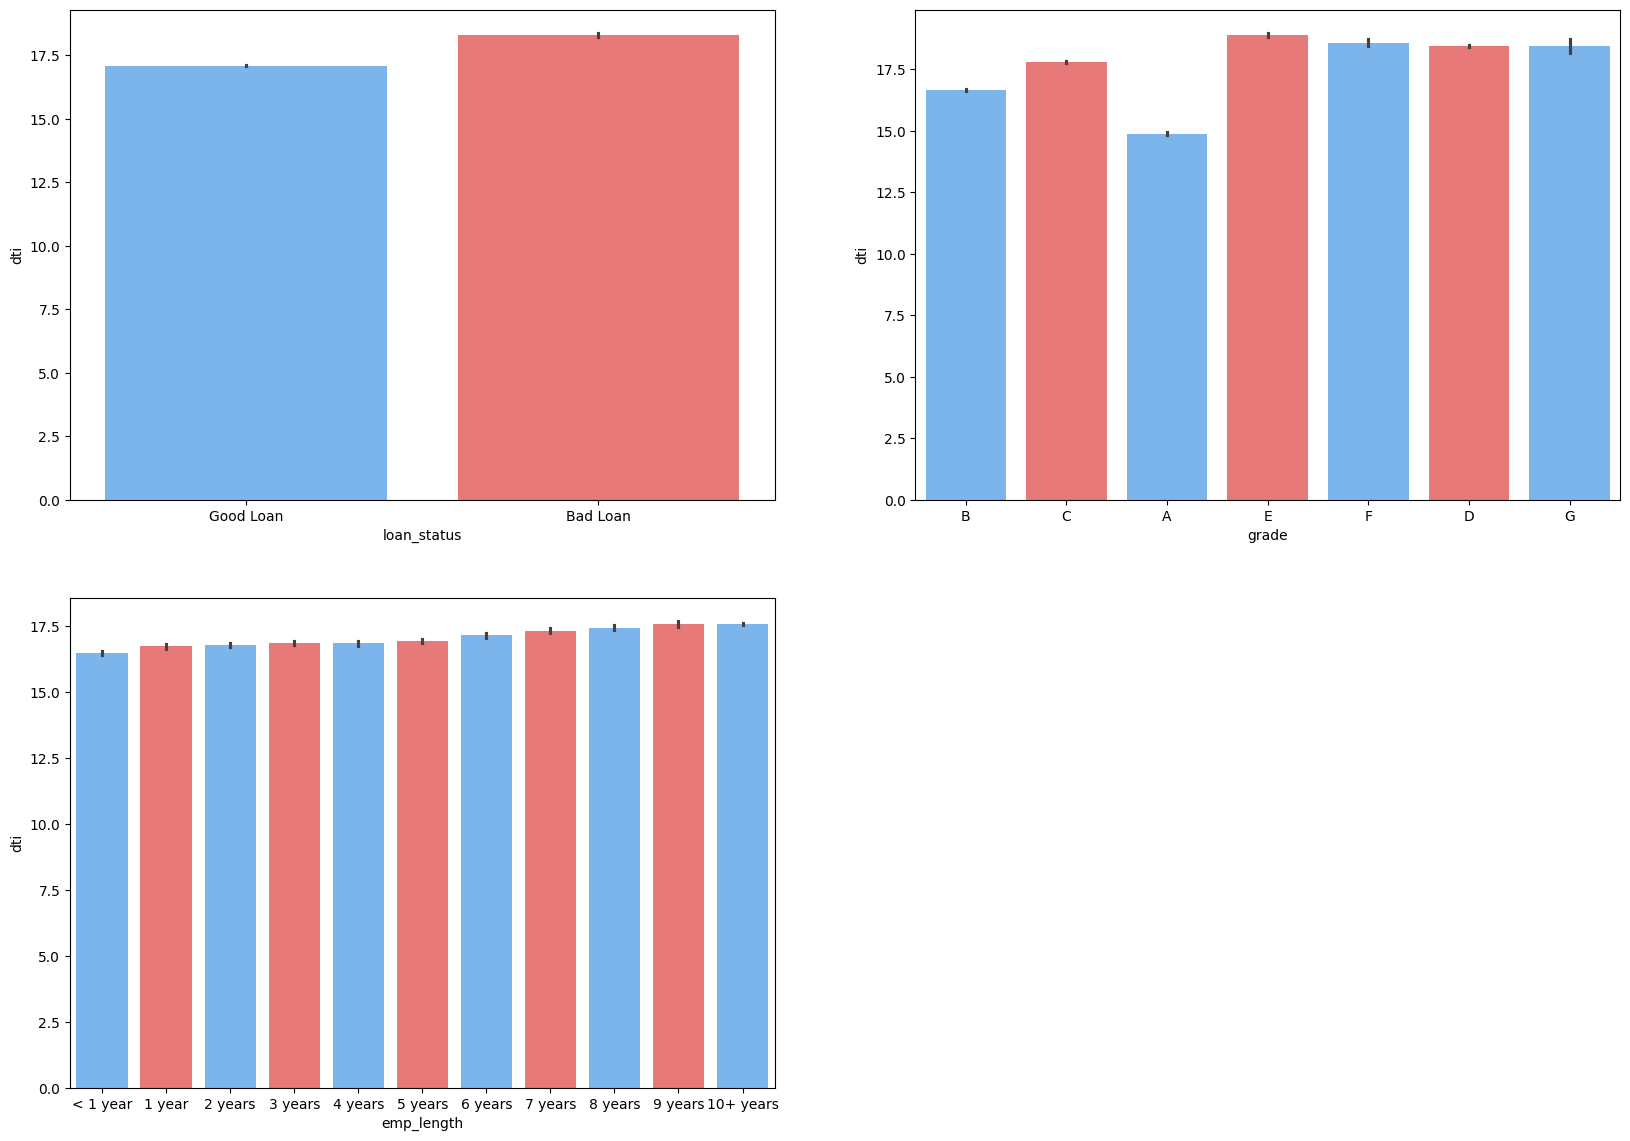

In [102]:
plt.figure(figsize=(20, 14))
plt.subplot(2, 2, 1)
sns.barplot(x='loan_status', y='dti', data=dfloan, palette=['#69B5FF', '#FA6767'])

plt.subplot(2, 2, 2)
sns.barplot(x='grade', y='dti', data=dfloan, palette=['#69B5FF', '#FA6767'])

plt.subplot(2, 2, 3)
sns.barplot(x='emp_length', y='dti', data=dfloan, palette=['#69B5FF', '#FA6767'])


<Axes: xlabel='home_ownership', ylabel='count'>

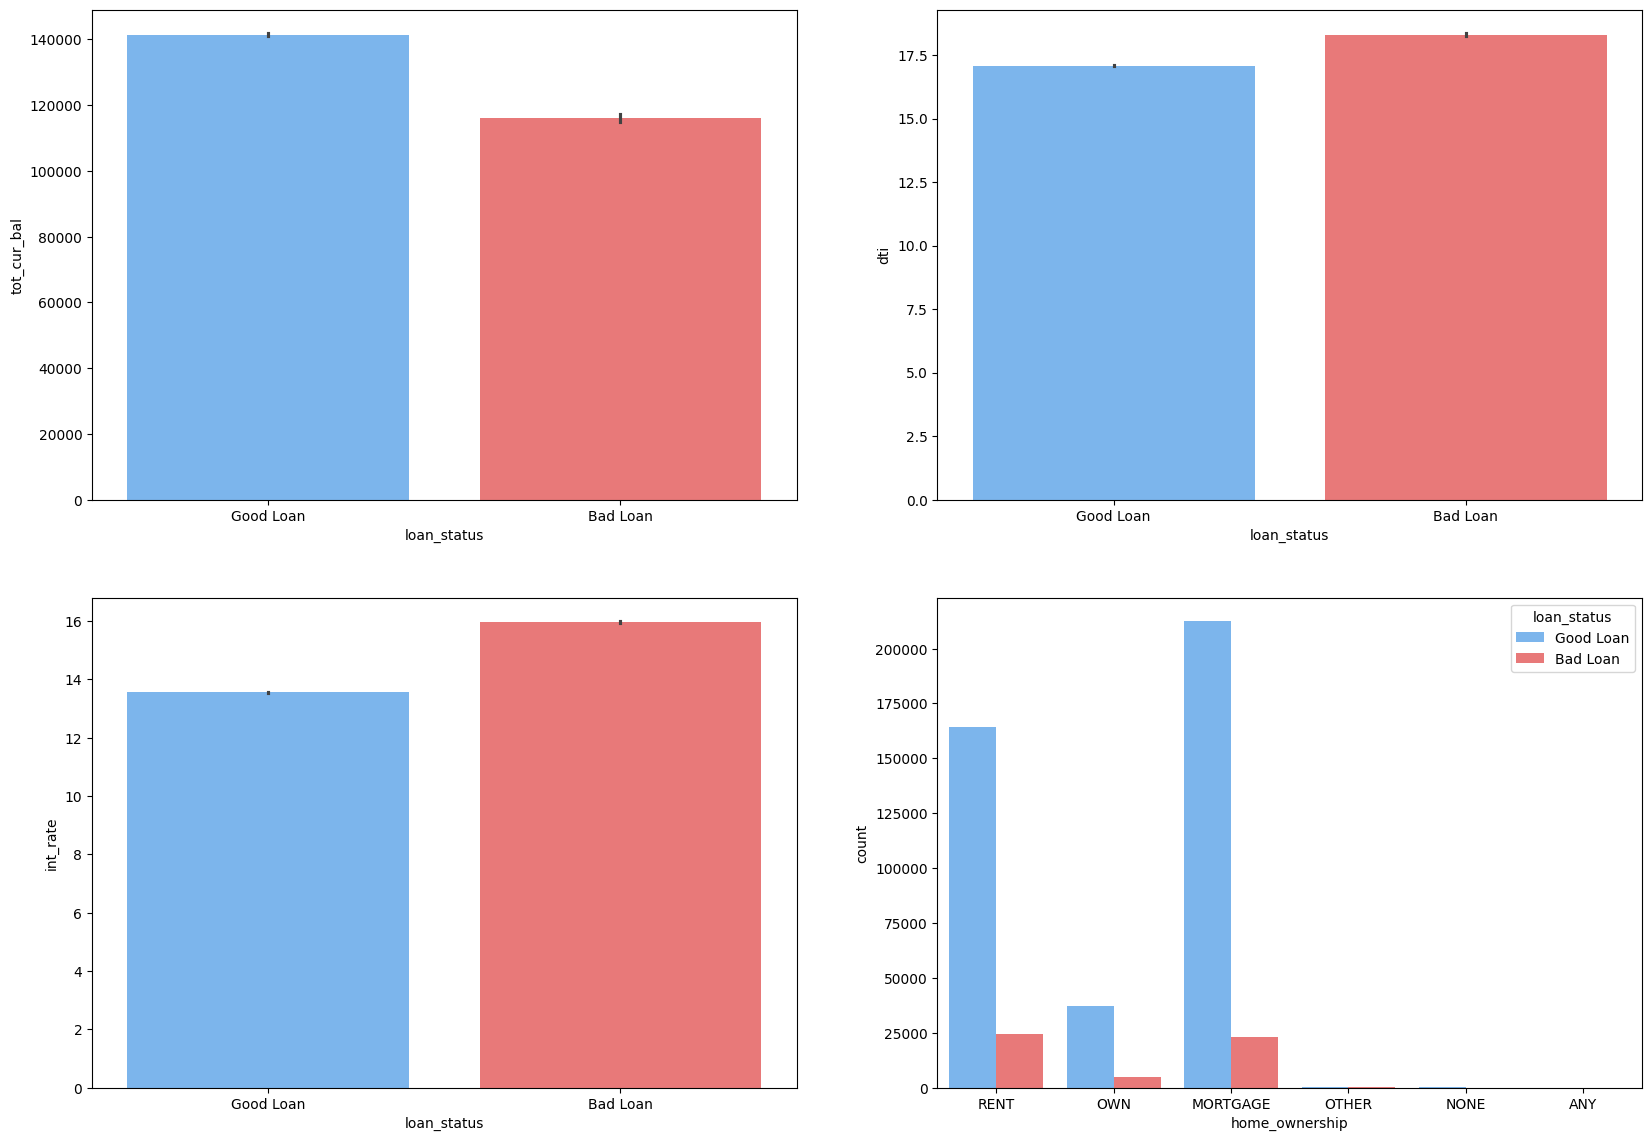

In [95]:
plt.figure(figsize=(20, 14))
plt.subplot(2, 2, 1)
sns.barplot(x='loan_status', y='tot_cur_bal', data=dfloan, palette=['#69B5FF', '#FA6767'])

plt.subplot(2, 2, 2)
sns.barplot(x='loan_status', y='dti', data=dfloan, palette=['#69B5FF', '#FA6767'])

plt.subplot(2, 2, 3)
sns.barplot(x='loan_status', y='int_rate', data=dfloan, palette=['#69B5FF', '#FA6767'])


In [37]:
dfloan.sample(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
444228,10000,10000,10000.0,36 months,13.98,341.68,C,C1,Maintenance,10+ years,MORTGAGE,48000.0,Verified,Feb-14,Good Loan,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 02/11/14 > To pay off all ...,debt_consolidation,Debt consolidation,948xx,CA,6.66,1.0,Jul-92,4.0,19.0,NaN,15.0,0.0,9703,25.3,33.0,f,0.00,0.00,11808.42,11808.42,10000.00,1808.42,0.0,0.0,0.0,Oct-15,5316.50,NaN,Oct-15,0.0,47.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,240.0,129098.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38400.0,NaN,NaN,NaN
232346,17350,17350,17350.0,36 months,6.99,535.64,A,A3,Assistant Marketing Manager,4 years,MORTGAGE,64000.0,Source Verified,Dec-14,Good Loan,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,601xx,IL,20.05,0.0,Dec-95,4.0,NaN,NaN,29.0,0.0,10596,15.5,44.0,w,11498.78,11498.78,6949.84,6949.84,5851.22,1098.62,0.0,0.0,0.0,Jan-16,535.64,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,197917.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68400.0,NaN,NaN,NaN
102148,5000,5000,5000.0,36 months,13.68,170.12,C,C1,Liberty house nursing home,10+ years,RENT,45000.0,Source Verified,Aug-13,Good Loan,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,073xx,NJ,5.68,0.0,Nov-00,0.0,NaN,77.0,11.0,1.0,5794,55.7,18.0,f,1293.56,1293.56,4763.12,4763.12,3706.44,1056.68,0.0,0.0,0.0,Dec-15,170.12,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,5794.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10400.0,NaN,NaN,NaN
247137,20000,20000,20000.0,60 months,8.67,411.98,B,B1,District Manager,4 years,MORTGAGE,79000.0,Verified,Nov-14,Good Loan,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,276xx,NC,14.60,0.0,Nov-88,0.0,NaN,96.0,7.0,1.0,6437,32.0,19.0,w,16074.23,16074.23,5758.09,5758.09,3925.77,1832.32,0.0,0.0,0.0,Jan-16,411.98,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,236196.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20100.0,NaN,NaN,NaN
415525,15000,15000,15000.0,36 months,12.49,501.74,B,B4,supervisor,10+ years,MORTGAGE,65000.0,Source Verified,Apr-14,Bad Loan,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,180xx,PA,9.86,0.0,Jan-96,0.0,40.0,NaN,6.0,0.0,6042,39.7,18.0,w,0.00,0.00,5017.40,5017.40,3622.60,1394.80,0.0,0.0,0.0,Feb-15,501.74,NaN,Jan-16,0.0,67.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,27273.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15200.0,NaN,NaN,NaN


<Axes: xlabel='purpose', ylabel='loan_amnt'>

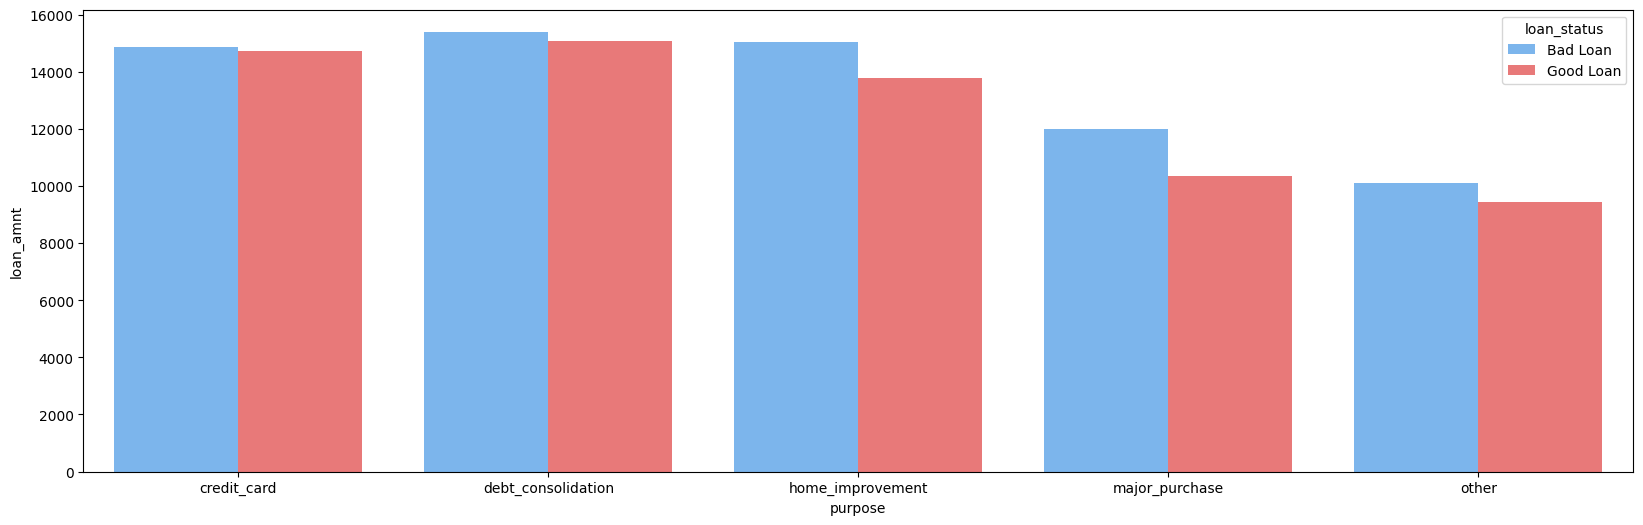

In [55]:
# dfloan.groupby(['purpose', 'loan_status'])['loan_amnt'].mean().unstack().plot(kind='bar', color=['#69B5FF', '#FA6767'], figsize=(20, 6))
purpose_status = dfloan.groupby(['purpose', 'loan_status'])['loan_amnt'].mean().reset_index()
# purpose_status
purpose_status[purpose_status.purpose.isin(top_purpose.index)]
plt.figure(figsize=(20, 6))
sns.barplot(x='purpose', y='loan_amnt', data=purpose_status[purpose_status.purpose.isin(top_purpose.index)], hue='loan_status', palette=target_colors)

<Axes: xlabel='emp_title'>

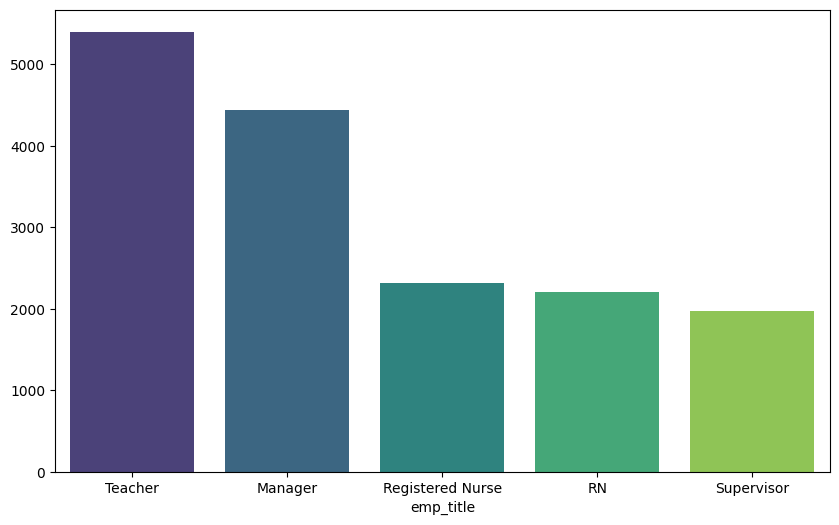

In [13]:
# Create barplot for top employee title
plt.figure(figsize=(10, 6))

top_emptitle = dfloan.emp_title.value_counts().head(5)

sns.barplot(x=top_emptitle.index, y=top_emptitle.values, palette='viridis')

In [23]:
dfloan.emp_title.value_counts()

emp_title
Teacher                              5399
Manager                              4438
Registered Nurse                     2316
RN                                   2204
Supervisor                           1967
                                     ... 
The Eastern Arizona AHEC                1
Delaware Quarries.com                   1
McCauley trucking and warehousing       1
save mart supermarkets                  1
Server Engineer Lead                    1
Name: count, Length: 205475, dtype: int64

<Axes: xlabel='term', ylabel='count'>

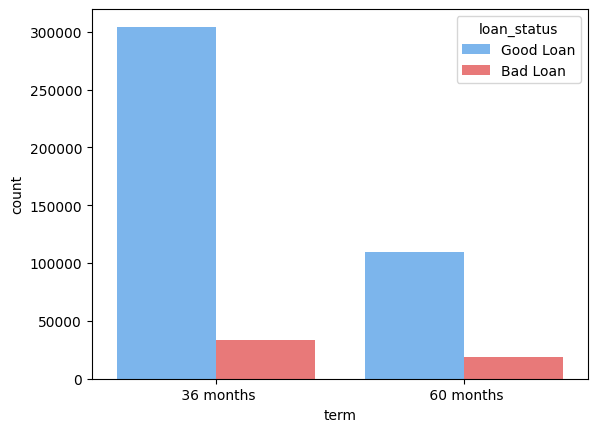

In [131]:
sns.countplot(x='term', data=dfloan, hue='loan_status', palette=target_colors)

## Data Preprocessing

In [ ]:
['url', 'desc', 'title', 'pymnt_plan', 'application', 'zip_code', 'addr_state', 'policy_code', 'acc_now_delinq']

## Just In Case

In [24]:
# # Get the top 5 states by loan count
# top_states = dfloan.addr_state.value_counts().head(5).index

# # Filter the dataframe to only include the top 5 states
# dfloan_top_states = dfloan[dfloan.addr_state.isin(top_states)]

# # Create a dataframe with counts of good and bad loans for each state
# loan_status_counts = dfloan_top_states.groupby(['addr_state', 'loan_status']).size().unstack()

# # Sort the dataframe by the total count of loans for each state
# loan_status_counts = loan_status_counts.loc[top_states]

# # Normalize the counts to get the proportion and convert to percentages
# loan_status_counts = (loan_status_counts.div(loan_status_counts.sum(axis=1), axis=0) * 100)

# # Set the figure size
# plt.figure(figsize=(12, 6))

# # Create a stacked bar chart
# bar1 = plt.bar(loan_status_counts.index, loan_status_counts['Good Loan'], color='#69B5FF')
# bar2 = plt.bar(loan_status_counts.index, loan_status_counts['Bad Loan'], bottom=loan_status_counts['Good Loan'], color='#FA6767')

# # Set the title and labels
# plt.title("Top 5 Client's Address State Default Rate", y=1.09, fontsize=20, fontweight='bold')
# plt.ylabel('Percentage of Clients', fontsize=15)
# plt.xlabel('State', fontsize=15)
# plt.legend([bar1, bar2], ['Good Loan', 'Bad Loan'], title='Loan Status', loc='upper right', bbox_to_anchor=(1.112, 1))

# # Add annotations to 'Bad Loan' bars
# for i in range(len(loan_status_counts.index)):
#     percentage = loan_status_counts['Bad Loan'].iloc[i]
#     plt.text(i, loan_status_counts['Good Loan'].iloc[i] + percentage/2, f'{percentage:.1f}%', ha='center', va='center', color='black', fontsize=12)

# sns.despine()
# # Display the plot
# plt.show()

In [97]:
# # Set the figure size
# plt.figure(figsize=(20, 6))

# # First subplot
# plt.subplot(1, 2, 1)
# order_grade = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
# hcolors = ['#898989'] + ['#F13F3F', '#FA8958'] + ['#898989'] * 5
# sns.countplot(x='grade', data=dfloan, order=order_grade, palette=hcolors)
# plt.title('Count of Loans by Grade', fontsize=18, fontweight='bold', y=1.09)
# plt.xlabel('Grade', fontsize=12.5, loc='left')
# plt.ylabel('Count', fontsize=12.5)
# sns.despine()

# # Second subplot
# plt.subplot(1, 2, 2)

# # Calculate the proportion of each loan status within each grade
# lstatus_props = dfloan.groupby('grade')['loan_status'].value_counts().unstack()

# # Reindex lstatus_props
# lstatus_props = lstatus_props.reindex(order_grade)

# # Normalize the counts to get the proportion and convert to percentages
# lstatus_props = (lstatus_props.div(lstatus_props.sum(axis=1), axis=0) * 100)

# # Create a stacked bar chart
# bars1 = plt.bar(lstatus_props.index, lstatus_props['Good Loan'], color=target_colors[0], label='Good Loan')
# bars2 = plt.bar(lstatus_props.index, lstatus_props['Bad Loan'], bottom=lstatus_props['Good Loan'], color=target_colors[1], label='Bad Loan')

# # Calculate total height of each bar
# total = [i+j for i,j in zip(lstatus_props['Good Loan'], lstatus_props['Bad Loan'])]

# # Add percentage annotations only for 'Bad Loan'
# for bar1, bar2, total in zip(bars1, bars2, total):
#     percentage2 = bar2.get_height() / total * 100
#     plt.text(bar2.get_x() + bar2.get_width()/2, bar1.get_height() + bar2.get_height() - 5, f'{percentage2:.1f}%', ha='center', va='bottom', color='black')

# # Set the title and labels
# plt.title("Client's Default Rate Compared by Their Grade", y=1.09, fontsize=18, fontweight='bold')
# plt.ylabel('Percentage of Clients', fontsize=12.5)

# # Add a legend
# plt.legend(title='Loan Status', loc='upper right', bbox_to_anchor=(1.12, 1))

# sns.despine()

# # Display the plot
# plt.tight_layout()
# plt.show()